# WE11-Autoencoder
# Rodgers Okeyo Ochieng
Description: In this exercise, you will create an autoencoder that recognizes 10 digits and the first and last characters of your last name.

1. Create a 28x28 pixel image of these characters. For instance, if the first character of your last name is K, then create 1 version of K and save this as a 28x28 image. Do this for the last character as well. 

NOTE: You can do this using any drawing/photo software. Write your letters with a mouse.  (one example site is https://kleki.com/Links to an external site.. You can specify the image size as 28x28, set the background to black, and then the pen color to white and draw your letter). You can download this image as png file -- or use any image/drawing program you are familiar with). 

2. Create a notebook (you should start with the tutorial #3 notebook - it will save you time). Load the MNIST dataset (see the tutorial from class) and the autoencoder you created and saved in Tutorial #1. Display the predictions for your two new characters and compare these to the original. 

3. Create a new autoencoder, and train this autoencoder with the MNIST dataset and your new images added. Add enough copies of your new characters to the MNIST dataset so that your model can identify your new characters.

4. Demonstrate your new encoding by showing the autoencoder recreate a random set of digits and your new characters.

The exercise is relatively easy if you understand the material in the in-class tutorial on autoencoders - so, be sure to review the tutorial (try experimenting with it, get to know how things work). This exercise will challenge you to do so.

Upload the following files:

* Your 2 new images (first and last characters of your last name)

* Your notebook

A saved version of your trained autoencoder (on your computer, this will be saved as a folder, therefore, you need to zip/archive this folder and submit the zip/archive file)

# Load needed packages

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow import keras

from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training
import tensorflow as tf
from tensorflow.keras.preprocessing import image


### Load our pretrained model

In [2]:
pretrained_model = keras.models.load_model('./initially_trained_autoencoder.tf')

### Load our new symbol and test the autoencoder on this new symbol
load the image for the last name ochieng. Here we then turn it into a numpy array and momalize through the 255 scale to get values between 0 and 1. From here flatten the two by two array into a one dimensional array. We then use the pretrained model to do a prediction of my last name ochieng and display it in the next code. I then do the same for my first name rodgers.

In [3]:
# Load a sample image
ochieng = tf.keras.utils.load_img('ochieng.png', target_size=(28, 28), color_mode="grayscale")


# Preprocess and predict ochieng from this sample
ochieng_arr = tf.keras.utils.img_to_array(ochieng)
ochieng_arr = ochieng_arr / 255.0  # Normalize between 0 and 1
ochieng_arr = ochieng_arr.reshape(1, 784)  # Convert single image to a batch with one image in it



predictions_ochieng = pretrained_model.predict([ochieng_arr])

print(predictions_ochieng.shape)



1/1 [==============================] - 0s 316ms/step
(1, 784)


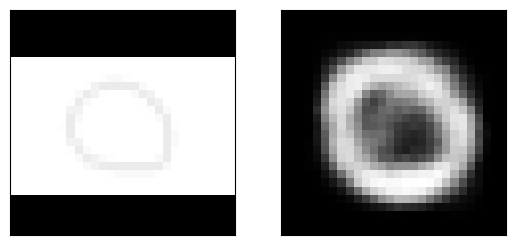

In [4]:
#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(ochieng, cmap="gray")

plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions_ochieng[0].reshape(28,28), cmap="gray")


plt.show()

In [15]:
pretrained_model1 = keras.models.load_model('./initially_trained_autoencoder.tf')

In [16]:
rodgers = tf.keras.utils.load_img('rodgers.png', target_size=(28, 28), color_mode="grayscale")
# Preprocess and predict rodgers from this sample
rodgers_arr = tf.keras.utils.img_to_array(rodgers)
rodgers_arr = rodgers_arr / 255.0  # Normalize between 0 and 1
rodgers_arr = rodgers_arr.reshape(1, 784)  # Convert single image to a batch with one image in it
predictions_rodgers = pretrained_model1.predict([rodgers_arr])
print(predictions_rodgers.shape)

1/1 [==============================] - 0s 231ms/step
(1, 784)


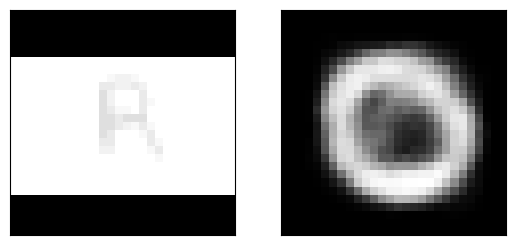

In [17]:
#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(rodgers, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions_rodgers[0].reshape(28,28), cmap="gray")



This autoencoder doesn't do a good job with this new symbol.

### Try to continue training the model on the original 10 digits and with the new symbol mixed in   

Let's try to retrain the original model with a mix of the new symbol and the original 10. Our goal it so avoid retraining with the entire original test test, and instead only use a small subset of the original test set.

In [8]:
# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


# How the model is updated.

Inlude the number of the last name and first name to include in the updated model. I played around with the numbers to find the one that would give me the best solution. I also included some of the original set of 10 numbers which I could also change as I monitor perfomance. Flatten the images into a one dimensional array and then stack them together with the train and test images to be use in the updated model

In [33]:
# number of samples of the new image; we can adjust as needed
num_ochieng = 200
num_rodgers = 500
# number of samples from the MNIST dataset to use to include in this new dataset
num_mnist = 1000

ochieng_arr = ochieng_arr.reshape(784) # flatten the ochieng
rodgers_arr = rodgers_arr.reshape(784) # flatten the rodgers
np.random.shuffle(train_images) # shuffle the MNIST dataset

new_ochieng = [ochieng_arr for _ in range(num_ochieng)] # create a new dataset of the same ochieng
new_rodgers = [rodgers_arr for _ in range(num_rodgers)] # create a new dataset of the same rodgers
new_image_set = np.vstack((train_images[:num_mnist], new_ochieng)) # combine the new images with the MNIST images
new_image_set = np.vstack((train_images[:num_mnist], new_rodgers)) # combine the new images with the MNIST images
np.random.shuffle(new_image_set) # shuffle the new dataset

new_images_train, new_images_test = np.split(new_image_set, [int(len(new_image_set)*.8)]) # split into training and test sets


In [34]:
updated_model = keras.models.load_model('./initially_trained_autoencoder.tf')

# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = updated_model.fit(
    x=new_images_train, # For autoencoders, both the input and the target are the same
    y=new_images_train, 
    epochs=15, 
    batch_size=128,
    shuffle=True, 
    validation_data=(new_images_test, new_images_test),
    callbacks=[early_stop]
)

Epoch 1/15
4/4 [==============================] - 4s 186ms/step - loss: 0.7534 - val_loss: 0.4777
Epoch 2/15
4/4 [==============================] - 0s 56ms/step - loss: 0.4385 - val_loss: 0.3511
Epoch 3/15
4/4 [==============================] - 0s 52ms/step - loss: 0.3580 - val_loss: 0.3195
Epoch 4/15
4/4 [==============================] - 0s 54ms/step - loss: 0.3253 - val_loss: 0.2959
Epoch 5/15
4/4 [==============================] - 0s 53ms/step - loss: 0.2988 - val_loss: 0.2754
Epoch 6/15
4/4 [==============================] - 0s 48ms/step - loss: 0.2713 - val_loss: 0.2529
Epoch 7/15
4/4 [==============================] - 0s 52ms/step - loss: 0.2433 - val_loss: 0.2297
Epoch 8/15
4/4 [==============================] - 0s 49ms/step - loss: 0.2157 - val_loss: 0.2060
Epoch 9/15
4/4 [==============================] - 0s 52ms/step - loss: 0.1865 - val_loss: 0.1801
Epoch 10/15
4/4 [==============================] - 0s 56ms/step - loss: 0.1585 - val_loss: 0.1573
Epoch 11/15
4/4 [===========

### Test the model on the original test set

313/313 [==============================] - 3s 8ms/step


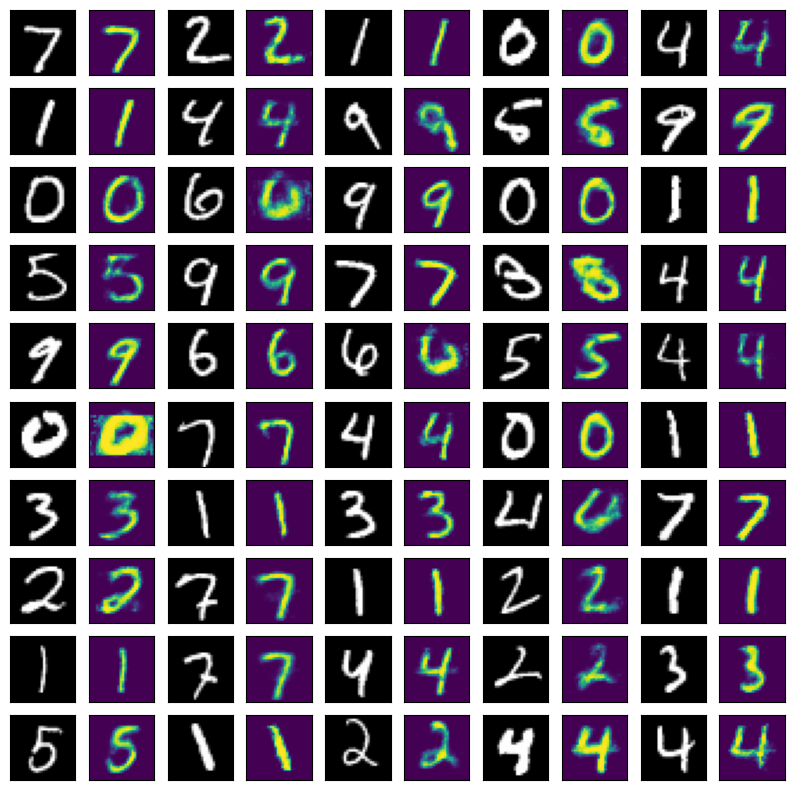

In [35]:
reconstructed_images = updated_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

### Test the model on the new test set

In [36]:
# Load a sample image
ochieng = tf.keras.utils.load_img('ochieng.png', target_size=(28, 28), color_mode="grayscale")
rodgers = tf.keras.utils.load_img('rodgers.png', target_size=(28, 28), color_mode="grayscale")

# Preprocess and predict ochieng from this sample
ochieng_arr = tf.keras.utils.img_to_array(ochieng)
ochieng_arr = ochieng_arr / 255.0  # Normalize between 0 and 1
ochieng_arr = ochieng_arr.reshape(1, 784)  # Convert single image to a batch with one image in it

# Preprocess and predict rodgers from this sample
rodgers_arr = tf.keras.utils.img_to_array(rodgers)
rodgers_arr = rodgers_arr / 255.0  # Normalize between 0 and 1
rodgers_arr = rodgers_arr.reshape(1, 784)  # Convert single image to a batch with one image in it

predictions_ochieng1 = updated_model.predict([ochieng_arr])
predictions_rodgers1 = updated_model.predict([rodgers_arr])
print(predictions_ochieng.shape)
print(predictions_rodgers.shape)

1/1 [==============================] - 0s 52ms/step
(1, 784)
(1, 784)


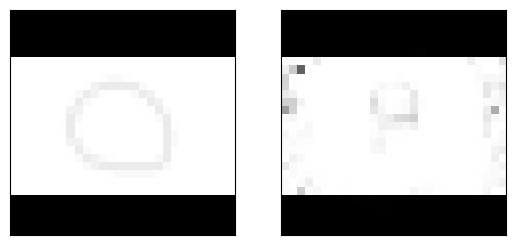

In [37]:
#####################################
# display the two images side by side
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(ochieng, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions_ochieng1[0].reshape(28,28), cmap="gray")


plt.show()

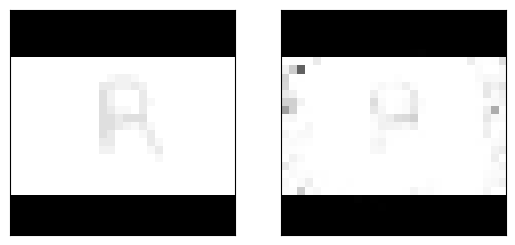

In [38]:
#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(rodgers, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions_rodgers1[0].reshape(28,28), cmap="gray")

### Summary 

Before this updated training the model was completely incapable of identifying my names. However after the updated model is built using both data from the pretraining and samples from my two names, The model is now able to detect the white background and even mimic some general features. If I had included letters R from different people then the model would have performed even better as it would learn from a large dataset. 

# Save model

In [42]:
import zipfile
import os
# Save the trained model folder
model_folder = './autoencoder_model'
updated_model.save(model_folder)

# Create a zip archive of the model folder
zip_filename = 'autoencoder_model.zip'
with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    # Add all files in the model folder to the zip archive
    for root, _, files in os.walk(model_folder):
        for file in files:
            file_path = os.path.join(root, file)
            zipf.write(file_path, arcname=os.path.relpath(file_path, model_folder))

# The 'autoencoder_model.zip' file is ready to be submitted


INFO:tensorflow:Assets written to: ./autoencoder_model\assets


INFO:tensorflow:Assets written to: ./autoencoder_model\assets
